In [36]:
!pip install --upgrade azure-cognitiveservices-vision-face
!pip install azure-cognitiveservices-vision-computervision


In [37]:
pip install azure-cognitiveservices-vision-face

Note: you may need to restart the kernel to use updated packages.


{"categories": [{"name": "outdoor_", "score": 0.00390625, "detail": {"landmarks": []}}, {"name": "outdoor_street", "score": 0.14453125, "detail": {"landmarks": []}}, {"name": "people_crowd", "score": 0.31640625}], "color": {"dominantColorForeground": "Grey", "dominantColorBackground": "Black", "dominantColors": ["Grey", "Black"], "accentColor": "6F3F37", "isBwImg": false, "isBWImg": false}, "description": {"tags": ["person", "outdoor", "building", "street", "road", "people", "walking", "group", "sidewalk", "city", "standing", "woman", "busy", "man", "cross", "corner", "sitting", "young", "holding", "sign", "crowded", "crowd", "doing", "store", "parked", "riding", "umbrella"], "captions": [{"text": "a group of people walking down the street", "confidence": 0.985491286580084}]}, "requestId": "f9e95dc0-a9f6-40a2-9ecd-22fff1669d71", "metadata": {"height": 902, "width": 600, "format": "Jpeg"}}


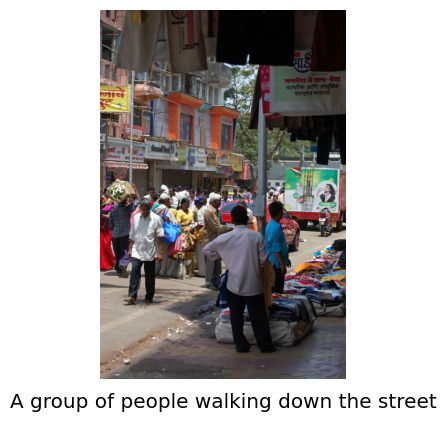

In [44]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face import FaceClient

from array import array
import os
from PIL import Image
import sys
import time
import requests
from matplotlib.patches import Rectangle
%matplotlib inline
import matplotlib.pyplot as plt
import json
from io import BytesIO

# This is the location of subscription Key and Endpoint used in Azure Vision API Environment
subscription_key = "ec2e5bbfea8e43918d736edb0e9623e6"
endpoint = "https://testrsg.cognitiveservices.azure.com/"

#this Section defines items passed through API to Azure
analyze_url = endpoint + "vision/v3.0/analyze"


# Set image_url to the URL of an image that you want to analyze.
image_url = "https://api.openverse.engineering/v1/images/fdc34d0d-8ef1-452b-b88c-dbc463b19f22/thumb/"

#Passing to API using HTTP post requires setup of headers to define my subscription key.
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
#parameters desired are passed through "params" definition and indicate specifically what is desired from Azure API
params = {'visualFeatures': 'Categories,Description,Color'}
#In this case, data containing items to operate (an Image) is supplied to be processed according to the parameters.
data = {'url': image_url}

#this data is sent as a post to the Azure host for analysis.  
response = requests.post(analyze_url, headers=headers,
                         params=params, json=data)
response.raise_for_status()

#this concludes the Azure API elements.  


# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(json.dumps(response.json()))
image_caption=analysis["description"]["captions"][0]["text"].capitalize()
# Display the image and overlay it with the caption.
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)
plt.show()